1. classifying with svm

### 1. import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)

%matplotlib inline

In [2]:
### 2. import date
data = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


각 데이터의 결측치, 비어있는 값에 대해 분석

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

age :  결측치가 많ㅇ지 않고 나이에 따라 생존 여부와 관련 있을 것 ㄱ타으므로 데이터를 채워 넣자.
cabin :  객실 번호와 관련이 있을 것 같아 보이지만 결측치가 너무 많아서 제거하는게 낫겠다...
embarked 2개밖에 없으므로 아무거로나 채워도 괜찮을거같음

1. Age의 약 20프로의 데이터가 Null로 되어있다.
2. Cabin의 데부분 값은 Null이다. 
3. Navme, Sex, Ticket, Cabin,Embarked는 숫자가 아닌 문자 값이다.
- 연관성 없는 데이터는 삭제하거나 숫자로 바꿔야 함
- (머신러닝은 숫자를 인식하기 떄문이당)



### 그래프를 이용한 데이터 분석

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
def bar_chart(feature) : 
    survived = data[data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df= pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

각 컬럼간의 상관관계를ㅇ 분석하기 윟해 그래프를 이용해서 분석해 보았다. 그래프를 활용하기 위해 matplotlib와 seaborn 라이브러리를활용했다.  Survived 컬럼과 다른 컬럼들 간의 상관관계를 분석할 것입니다. 

먼저 성별, 생존한 사람의 경우 여자가 더 많고, 사망한 경우 남자가 더 많다.

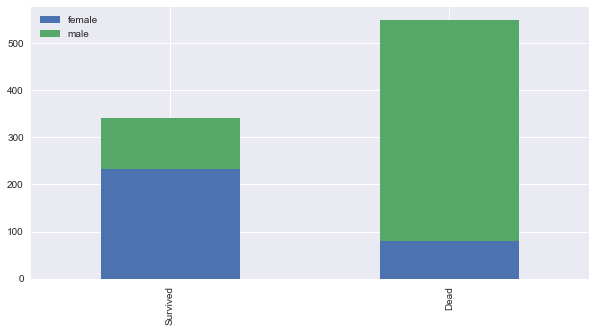

In [8]:
 bar_chart('Sex')

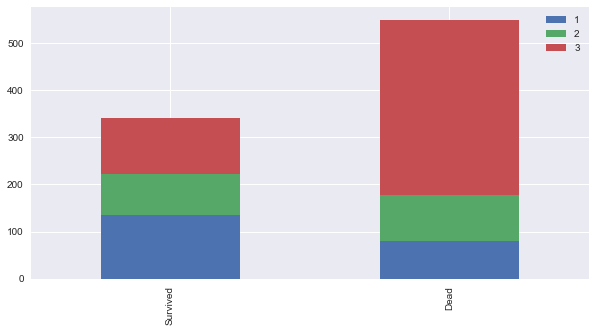

In [9]:
# 승선권
bar_chart('Pclass')

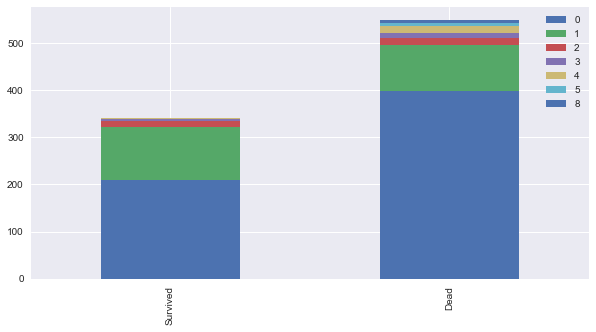

In [10]:
# 형제 자매, 배우자 수에 따른 생존 여부
bar_chart('SibSp')

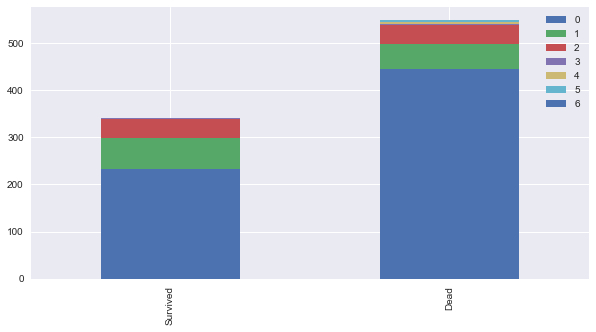

In [11]:
bar_chart('Parch')

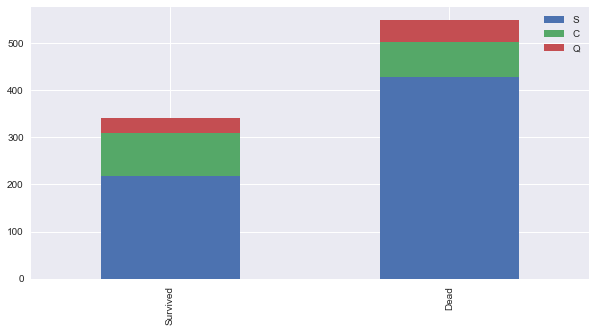

In [12]:
# 승선한 항구에 따른 생존 여부
bar_chart('Embarked')

데이터 분석 결과 Pclass, Sex, Age, SibSp, Parch, Embarked 컬럼의 경우 실제로 Survived 에 영향을 끼침을 알 수 있으므로 이를 바탕으로 Feature Engineering을 진행한다. 

### Feature Engineering
머신러닝 알고리즘을 작동하기 위해 데이터에 대해 특징을 만들어 내는 과정. 간단히 정리하면 모델의 성능을 높이기 위해 모델에 입력할 데이터를 만들기 위해 주어진 초기 데이터로부터 특징을 가공하고 생성하는 전체 과정을 의미한다. 

#### 앞선 데이터 분석을 바탕으로 이렇게 데이터를 가공해 보겠습니다. 
1. Cabin과 Ticket 두 값은 삭제한다. (갑싱 비어있고 연관경이 없다는 판단하에) 
2. Embarked Name, sex값은 숫자로 변경한다. 
3. Age의 Null 데이터를 채워 넣을 것이다. 
4. Age의 값의 범위를 줄일 것입니다. (큰 범위는 머신러닝 분석시 좋지 않다. )
5. Fare의 값도 범위를 줄일 것입니다. 


### 값 삭제


In [13]:
#### Cabin, ,Ticket 값 삭제 
data = data.drop(['Cabin'],axis =1)
data = data.drop(['Ticket'],axis = 1)

test = test.drop(['Cabin'],axis =1)
test = test.drop(['Ticket'],axis = 1)


In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Embarked 값 가공
- 먼저 각각 값의 개수 (S, C, Q)부터 살펴보겟움 

In [15]:
southampton = data[data["Embarked"] == "S"].shape[0]
print("S : ",southampton)
cherbourg = data[data["Embarked"] == "C"].shape[0]
print("C : ",cherbourg)
queenstown = data[data["Embarked"] == "Q"].shape[0]
print("Q : ", queenstown)

S :  644
C :  168
Q :  77


In [16]:
# S 가 많으니까 결측치를 S로 채워주자
data = data.fillna({"Embarked" : "S"})

In [17]:
embarked_mapping = {"S":1, "C":2,"Q":3}
data["Embarked"] = data["Embarked"].map(embarked_mapping)
test["Embarked"] = test["Embarked"].map(embarked_mapping)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


## Name 값 가공하기
문자열 파싱을 통해 가공함. 


In [18]:
combine =[data, test]
for  dataset in combine :
     dataset["Title"] = dataset.Name.str.extract(' ([A-za-z]+)\.', expand = False)
        
pd.crosstab(data['Title'], data['Sex'])    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


대부분 데이터가 정확했고, 이를 바탕으로 비슷한 글자는 바꾸고 최대한 줄여서 정리해 보겠다. 
- Mr,Mrs, Miss, Royal, rare, Master 6개로 줄여보겠음


In [19]:
for dataset in combine : 
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle',"Miss")
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    
data[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [20]:
# 위 데이터 바탕으로 1~6 까지로 매핑을 하여 숫자로 변경하였다.. 
# map() 함수는 데이터 가공에서 가장 많이 쓰인다.. 

title_mapping = {'Mr':1, "Miss":2, "Mrs":3, "Master":4, "Royal":5, "Rare" :6}

for dataset in combine : 
    dataset["Title"] = dataset['Title'].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)
    
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,1


In [21]:
# train 함수의 Name과 PassengerId 삭제
data = data.drop(['Name','PassengerId'],axis = 1)
test = test.drop(['Name'],axis =1)
combine = [data, test]
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,1,1
1,1,1,female,38.0,1,0,71.2833,2,3
2,1,3,female,26.0,0,0,7.9250,1,2
3,1,1,female,35.0,1,0,53.1000,1,3
4,0,3,male,35.0,0,0,8.0500,1,1


이와 동시에 Sex값도 map() 함수를 사용하여 숫자로 변경을 했습니다. 
간단하게 male 0 ,그리고 female은 1로 변경했습니다. 

In [23]:
data2 = data
test2 = test

In [24]:
sex_mapping = {'male' : 0, 'female' : 1}
for dataset in combine : 
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,2,3
2,1,3,1,26.0,0,0,7.9250,1,2
3,1,1,1,35.0,1,0,53.1000,1,3
4,0,3,0,35.0,0,0,8.0500,1,1


## Age 값 가공하기
Null 값도 많고, 간단하게 평균값으로 넣어도 될까,,, 
일단 -0.5 를 채워넣은 후 pandas 의 cut() 함수를 사용해서 AgeGroup을 만들어보자 
cut() 함수는 각 구간의 값을 특정 값으로 정의해주는 함수입니다. 


In [25]:
# 빈곳을 -0.5로
data['Age'] = data['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)
#나이는 숫자로
bins = [-1,0,5,12,18,24,35,60,np.inf]
labels = ['Unknown','Baby', 'Child','Teenager','Student','Young Adult','Adult','Senior']
data['AgeGroup'] = pd.cut(data["Age"],bins,labels = labels)
test['AgeGroup']= pd.cut(test["Age"],bins,labels = labels)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult


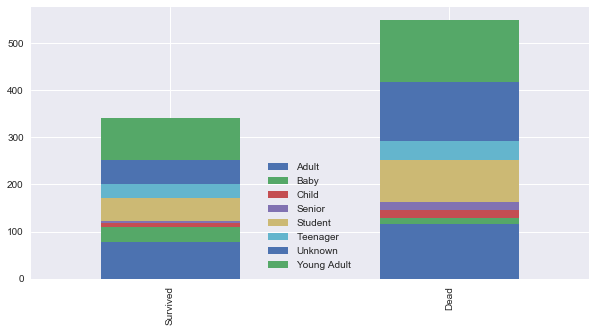

In [26]:
bar_chart('AgeGroup')

In [27]:
age_title_mapping = {1:"Young Adult", 2 : "Student", 3:"Adult", 4 : "Baby", 5 : "Adult", 6 :"Adult"}

for x in range(len(data["AgeGroup"])):
    if data["AgeGroup"][x] =="Unknown" : 
        data["AgeGroup"][x] = age_title_mapping[data["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] =="Unknown" : 
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]
        
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult


In [28]:
#AgeGroup을 숫자로 바꿔보겠습니다. 그 후 Age를 삭제해 줍니다. 
age_mapping = {'Baby' : 1, 'Child':2,'Teenager':3, 'Student':4, 'Young Adult':5,'Adult':6,'Senior':7}
data['AgeGroup'] = data['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

data = data.drop(['Age'],axis = 1)
test = test.drop(['Age'],axis = 1)


In [29]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,1,0,7.2500,1,1,4
1,1,1,1,1,0,71.2833,2,3,6
2,1,3,1,0,0,7.9250,1,2,5
3,1,1,1,1,0,53.1000,1,3,5
4,0,3,0,0,0,8.0500,1,1,5


In [30]:
# Fare 는 간단하게 qcut 사용해 보겠습니다. 
# 4개의 범위를 나눠서 1,2,3,4 로 바꾸었습니다. 

data['FareBand'] = pd.qcut(data['Fare'],4, labels = [1,2,3,4])
test['FareBand'] = pd.qcut(test['Fare'],4, labels = [1,2,3,4])

data = data.drop(['Fare'], axis = 1)
test = test.drop(['Fare'],axis=1)

data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,0,3,0,1,0,1,1,4,1
1,1,1,1,1,0,2,3,6,4
2,1,3,1,0,0,1,2,5,2
3,1,1,1,1,0,1,3,5,4
4,0,3,0,0,0,1,1,5,2


이제는 적절한 머신러닝 모델을 선택하여 예측만 하면 마무리 됩니다. 

## Data Modeling

In [31]:
data2 = data
test2 = test

In [33]:
train_data = data.drop('Survived',axis = 1) #X
target = data['Survived']#Y

train_data.shape, target.shape

((891, 8), (891,))

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
AgeGroup    891 non-null int64
FareBand    891 non-null category
dtypes: category(1), int64(8)
memory usage: 56.8 KB


sklearn 라이브러리를 사용할 것임. 
K-fold를 통해 교차검증, 랜덤포레스트 알고리즘 활용

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits =10,shuffle=True, random_state  = 0)
import numpy as np 

테스트 모델을 찾기 전에 K-fold cross validation 을 사용하여 정확도를 향상시킬 것입니다. K-fold cross validation은 교차 검증의 한 ㄴ방법으로 일ㄺ반적으로 검증용 데이터가 별도로 존재하지 안ㄶ는 경우가 많지 않기 때문에 보통은 원래 학습용으로 확보한 데이터를 학습용과 검증용으로 분리하여 하ㅏㄱ습용데이터로 학습한 후 거믕용 데이터로 검증합니다. 이 때 데이터를 어떻게 =분리하느냐에 따라 검증 성능이 다랄질 수 있습니다. 여라가지 방식으로 데이터를 분리하여 검증을 실시하고 평균성능과 성능분산을 모두 구합니다. 이러한 방법을 교차검증이라고 합니다. 

In [47]:
clf = RandomForestClassifier(n_estimators = 13)

In [48]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target, cv = k_fold, n_jobs=1, scoring=scoring)
score

array([0.82222222, 0.84269663, 0.79775281, 0.78651685, 0.85393258,
       0.84269663, 0.83146067, 0.82022472, 0.76404494, 0.78651685])

In [53]:
round(np.mean(score)*100,2)

81.48

## SVM


In [61]:
from sklearn.svm import SVC  
import numpy as np

In [62]:
clf = SVC(C=1,kernel = 'rbf',coef0 = 1)

In [63]:
clf

SVC(C=1, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [83]:
scoring = 'accuracy'
score = cross_val_score(clf,train_data, target,cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

C:\Users\YOONHOI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\YOONHOI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\YOONHOI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\YOONHOI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: Fut

[0.82222222 0.80898876 0.82022472 0.80898876 0.85393258 0.80898876
 0.82022472 0.85393258 0.82022472 0.83146067]


C:\Users\YOONHOI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [84]:
round(np.mean(score)*100,2)

82.49

## Testing

In [85]:
clf = SVC(C=1, kernel = 'rbf', coef0=1)
clf.fit(train_data,target)

C:\Users\YOONHOI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [86]:
test_data = test.drop("PassengerId",axis =1).copy()

In [93]:
prediction= clf.predict(test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null int64
Title       418 non-null int64
AgeGroup    418 non-null int64
FareBand    417 non-null category
dtypes: category(1), int64(7)
memory usage: 23.5 KB


In [75]:
test_data

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,892,3,0,0,0,3,1,5,1
1,893,3,1,1,0,1,3,6,1
2,894,2,0,0,0,3,1,7,2
3,895,3,0,0,0,1,1,5,2
4,896,3,1,1,1,1,3,4,2
5,897,3,0,0,0,1,1,3,2
6,898,3,1,0,0,3,2,5,1
7,899,2,0,1,1,1,1,5,3
8,900,3,1,0,0,2,3,3,1
9,901,3,0,2,0,1,1,4,3


In [89]:
import collections, numpy 
collections.Counter(prediction)

NameError: name 'prediction' is not defined

In [91]:
submission = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : prediction
})
submission.to_csv('submission.csv',index = False)

NameError: name 'prediction' is not defined

In [92]:
submission = pd.read_csv("submission.csv")
submission.head(5)

FileNotFoundError: File b'submission.csv' does not exist